In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
from thinning import sample_hawkes_process_thinning_true_vectorised
from utils import exp_kernel_vectorised, constant_background, plot_counting_process
from mle import log_likelihood, optimise_params, optimise_params_general

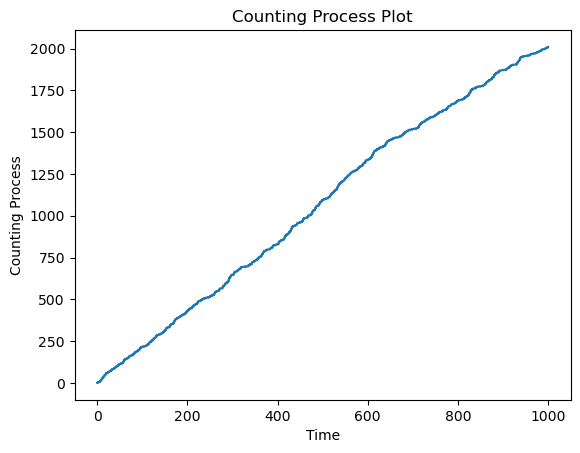

In [3]:
max_T = 1000
hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, exp_kernel_vectorised)
plot_counting_process(hawkes_realisation)

In [8]:
data = hawkes_realisation, max_T

In [22]:
optimise_params(data, [0.5,0.5,0.5], 1e-10)

(array([0.97434929, 0.92127035, 1.95540661]),
   message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
   success: True
    status: 0
       fun: 536.7415117016421
         x: [ 9.743e-01  9.213e-01  1.955e+00]
       nit: 15
       jac: [-5.207e-03 -7.822e-03  7.162e-03]
      nfev: 72
      njev: 18
  hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>)

Now 1e-10 working OK.

We experiment with different starting values and epsilons.

In [23]:
optimise_params(data, [1,1,2], 1e-10)

(array([0.97432545, 0.92122249, 1.95522322]),
   message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
   success: True
    status: 0
       fun: 536.7415112844446
         x: [ 9.743e-01  9.212e-01  1.955e+00]
       nit: 8
       jac: [ 4.547e-05  4.547e-05  4.547e-05]
      nfev: 40
      njev: 10
  hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>)

In [24]:
optimise_params(data, [10,10,10], 1e-10)

(array([0.97432487, 0.92122124, 1.95521978]),
   message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
   success: True
    status: 0
       fun: 536.741511284373
         x: [ 9.743e-01  9.212e-01  1.955e+00]
       nit: 27
       jac: [-9.095e-05 -6.821e-05  2.274e-05]
      nfev: 164
      njev: 41
  hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>)

In [25]:
optimise_params(data, [10,10,10], 1e-1)

(array([0.97432915, 0.92121699, 1.95521611]),
   message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
   success: True
    status: 0
       fun: 536.7415112884696
         x: [ 9.743e-01  9.212e-01  1.955e+00]
       nit: 23
       jac: [ 1.728e-03  4.547e-05 -3.183e-04]
      nfev: 140
      njev: 35
  hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>)

In [26]:
optimise_params(data, [100,100,100], 1e-10)

(array([0.97432541, 0.92122182, 1.9552222 ]),
   message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
   success: True
    status: 0
       fun: 536.7415112844028
         x: [ 9.743e-01  9.212e-01  1.955e+00]
       nit: 32
       jac: [-4.547e-05 -1.137e-04  4.547e-05]
      nfev: 232
      njev: 58
  hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>)

In [27]:
optimise_params(data, [100,100,100], 1e-1)

(array([ 1.48318215,  2.59922454, 16.50640646]),
   message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
   success: True
    status: 0
       fun: 647.4273198585151
         x: [ 1.483e+00  2.599e+00  1.651e+01]
       nit: 22
       jac: [-4.678e+01  5.020e-01  3.867e+00]
      nfev: 180
      njev: 45
  hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>)

In this case, if starting guess is too large and epsilon is too large, get inaccurate result.

## Improving estimates

### Same observation over longer time periods

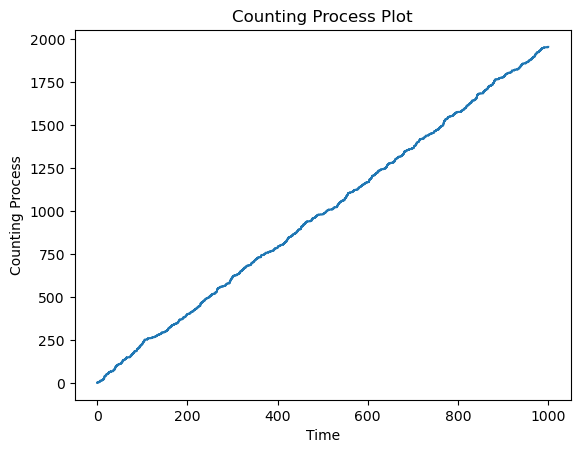

In [56]:
max_T = 1000
hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, exp_kernel_vectorised)
plot_counting_process(hawkes_realisation)

In [57]:
hawkes_realisation = np.array(hawkes_realisation)

In [88]:
step = 100
max_T_vals = np.arange(step, max_T+step, step)
max_T_vals

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])

In [89]:
starting_values = [0.5,0.5,0.5]

params = np.zeros((3, len(max_T_vals)))
for i, T in enumerate(max_T_vals):
    index = np.searchsorted(hawkes_realisation, T)
    data = hawkes_realisation[:index-1], T
    current_params, _ = optimise_params(data, starting_values, 1e-6)
    params[:, i] = current_params

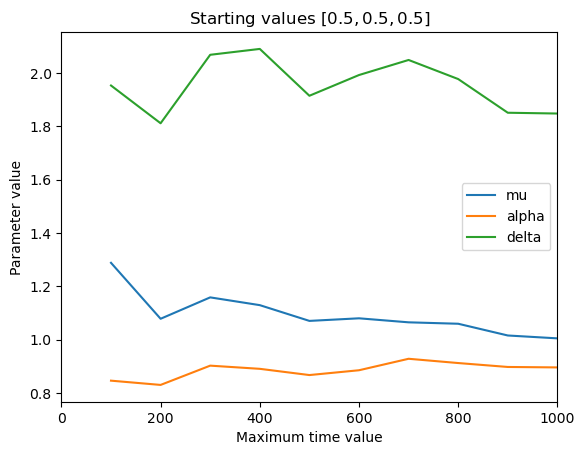

In [90]:
plt.plot(max_T_vals, params[0], label='mu')
plt.plot(max_T_vals, params[1], label='alpha')
plt.plot(max_T_vals, params[2], label='delta')
plt.legend()
plt.xlabel('Maximum time value')
plt.xlim(0, max_T)
plt.ylabel('Parameter value')
plt.title(f'Starting values ${starting_values}$')
plt.show()

In [91]:
starting_values = [1,0.1,1]

params = np.zeros((3, len(max_T_vals)))
for i, T in enumerate(max_T_vals):
    index = np.searchsorted(hawkes_realisation, T)
    data = hawkes_realisation[:index-1], T
    current_params, _ = optimise_params(data, starting_values, 1e-6)
    params[:, i] = current_params

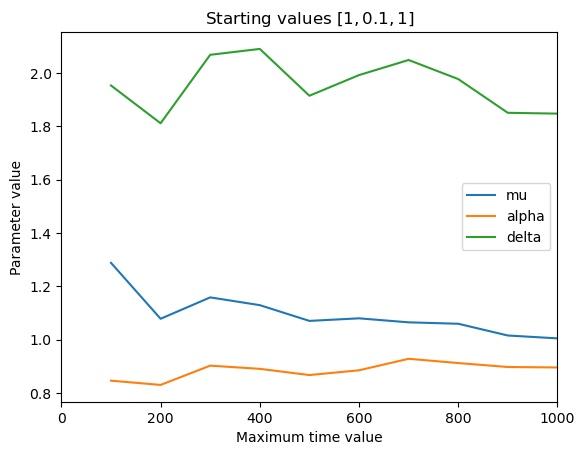

In [92]:
plt.plot(max_T_vals, params[0], label='mu')
plt.plot(max_T_vals, params[1], label='alpha')
plt.plot(max_T_vals, params[2], label='delta')
plt.legend()
plt.xlabel('Maximum time value')
plt.xlim(0, max_T)
plt.ylabel('Parameter value')
plt.title(f'Starting values ${starting_values}$')
plt.show()

In [94]:
starting_values = [2,2,2]

params = np.zeros((3, len(max_T_vals)))
for i, T in enumerate(max_T_vals):
    index = np.searchsorted(hawkes_realisation, T)
    data = hawkes_realisation[:index-1], T
    current_params, _ = optimise_params(data, starting_values, 1e-6)
    params[:, i] = current_params

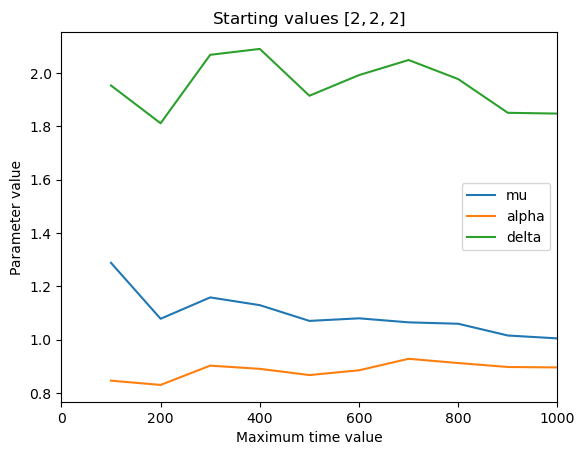

In [95]:
plt.plot(max_T_vals, params[0], label='mu')
plt.plot(max_T_vals, params[1], label='alpha')
plt.plot(max_T_vals, params[2], label='delta')
plt.legend()
plt.xlabel('Maximum time value')
plt.xlim(0, max_T)
plt.ylabel('Parameter value')
plt.title(f'Starting values ${starting_values}$')
plt.show()

If you choose starting values that are too large/ too far away, MLE takes longer to converge and could be less accurate.

### Multiple observations over same time period

In [100]:
max_T = 100
num_samples = 2
hawkes_realisations = []
for i in range(num_samples):
    hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, exp_kernel_vectorised)
    hawkes_realisations.append(hawkes_realisation)

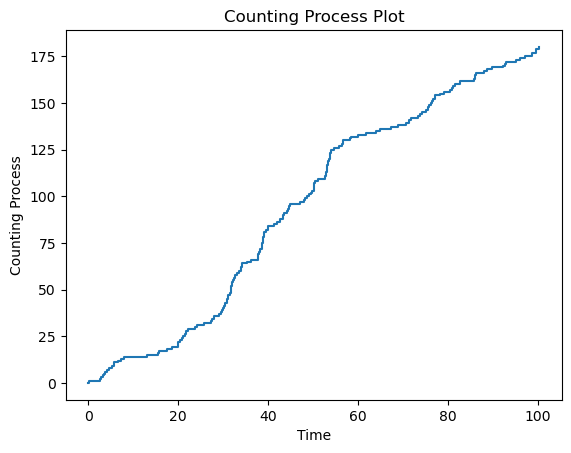

In [101]:
plot_counting_process(hawkes_realisations[0])

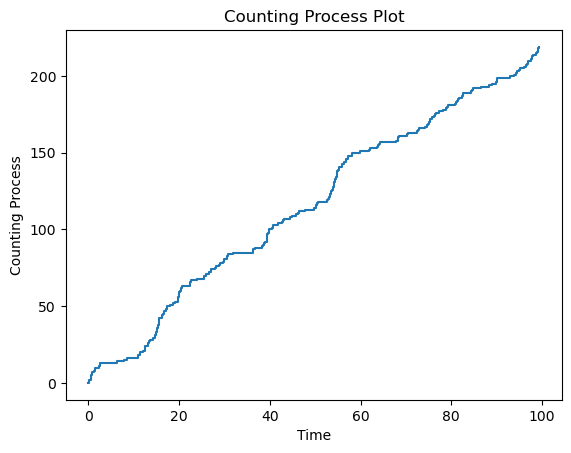

In [103]:
plot_counting_process(hawkes_realisations[1])

In [105]:
params = [1,1,2]

In [106]:
log_likelihood(params, (hawkes_realisations[0], max_T))

-54.00566105718258

In [107]:
log_likelihood(params, (hawkes_realisations[1], max_T))

-25.07123275187041

In [10]:
def sum_log_likelihood(params, data):

    hawkes_realisations, max_T = data

    temp = 0
    for events_list in hawkes_realisations:
        temp += log_likelihood(params, (events_list, max_T))

    return temp

In [11]:
sum_log_likelihood(params, (hawkes_realisations, max_T))

NameError: name 'params' is not defined

Will it minimise?

In [110]:
initial_guess = [0.5, 0.5, 0.5]

epsilon = 1e-6
bounds = [(epsilon, None), (epsilon, None), (epsilon, None)]

result = minimize(lambda params: -sum_log_likelihood(params, data=(hawkes_realisations, max_T)), initial_guess, bounds=bounds)

optimised_parameters = result.x

In [111]:
optimised_parameters

array([0.9907195 , 0.88402146, 1.74030493])

How does this compare to individual estimates?

In [112]:
optimise_params((hawkes_realisations[0], max_T), initial_guess, 1e-6)

(array([0.87231684, 0.69677917, 1.33218666]),
   message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
   success: True
    status: 0
       fun: 53.22651222788352
         x: [ 8.723e-01  6.968e-01  1.332e+00]
       nit: 14
       jac: [-1.137e-05  2.842e-05 -5.684e-06]
      nfev: 64
      njev: 16
  hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>)

In [113]:
optimise_params((hawkes_realisations[1], max_T), initial_guess, 1e-6)

(array([1.12055183, 1.0933415 , 2.23020471]),
   message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
   success: True
    status: 0
       fun: 24.75018196949614
         x: [ 1.121e+00  1.093e+00  2.230e+00]
       nit: 16
       jac: [ 8.527e-06 -7.105e-05  5.684e-05]
      nfev: 76
      njev: 19
  hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>)

In [114]:
# Output of above

# sum of two log-likelihoods
# array([0.9907195 , 0.88402146, 1.74030493])

# realisation 0
# array([0.87231684, 0.69677917, 1.33218666])

# realisation 1
# array([1.12055183, 1.0933415 , 2.23020471])

So observing two increased accuracy of the estimates!

Now extend to even more than two realisations...

In [26]:
max_T = 100
num_samples = 50
hawkes_realisations = []
for i in range(num_samples):
    hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, exp_kernel_vectorised)
    hawkes_realisations.append(hawkes_realisation)

In [27]:
starting_values = [0.5, 0.5, 0.5]

params = np.zeros((3, num_samples))
for i in range(num_samples):
    print(i)
    data = hawkes_realisations[:i+1], max_T
    neg_log_likelihood_fct = lambda params: -sum_log_likelihood(params, data=data)
    current_params, _ = optimise_params_general(neg_log_likelihood_fct, starting_values, 1e-6)
    params[:, i] = current_params

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


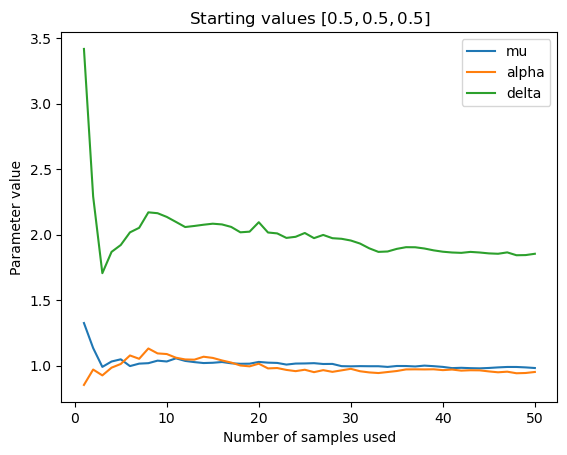

In [28]:
plt.plot(range(1, num_samples+1), params[0], label='mu')
plt.plot(range(1, num_samples+1), params[1], label='alpha')
plt.plot(range(1, num_samples+1), params[2], label='delta')
plt.legend()
plt.xlabel('Number of samples used')
plt.ylabel('Parameter value')
plt.title(f'Starting values ${starting_values}$')
plt.show()

In [29]:
starting_values = [1, 0.1, 1]

params = np.zeros((3, num_samples))
for i in range(num_samples):
    print(i)
    data = hawkes_realisations[:i+1], max_T
    neg_log_likelihood_fct = lambda params: -sum_log_likelihood(params, data=data)
    current_params, _ = optimise_params_general(neg_log_likelihood_fct, starting_values, 1e-6)
    params[:, i] = current_params

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


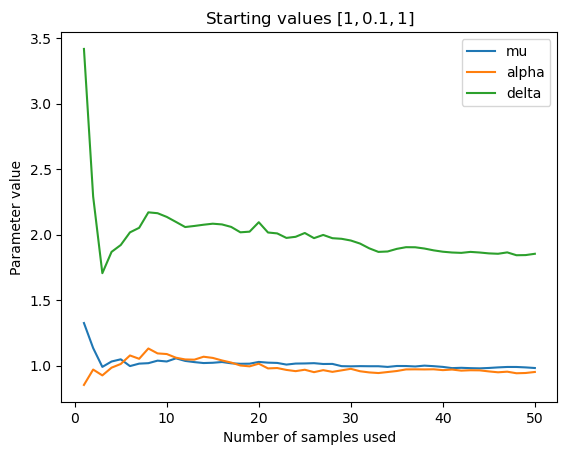

In [30]:
plt.plot(range(1, num_samples+1), params[0], label='mu')
plt.plot(range(1, num_samples+1), params[1], label='alpha')
plt.plot(range(1, num_samples+1), params[2], label='delta')
plt.legend()
plt.xlabel('Number of samples used')
plt.ylabel('Parameter value')
plt.title(f'Starting values ${starting_values}$')
plt.show()

In [31]:
starting_values = [2, 2, 2]

params = np.zeros((3, num_samples))
for i in range(num_samples):
    print(i)
    data = hawkes_realisations[:i+1], max_T
    neg_log_likelihood_fct = lambda params: -sum_log_likelihood(params, data=data)
    current_params, _ = optimise_params_general(neg_log_likelihood_fct, starting_values, 1e-6)
    params[:, i] = current_params

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


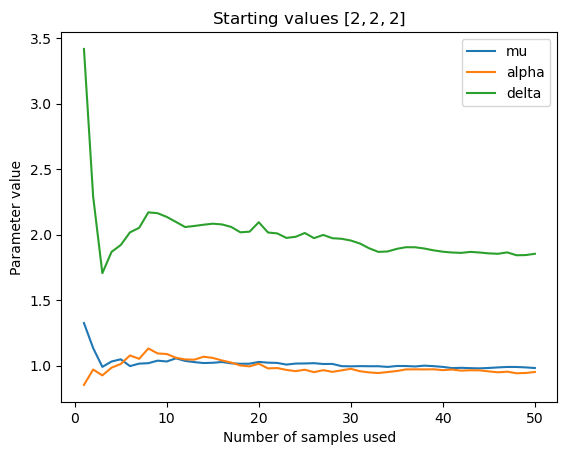

In [32]:
plt.plot(range(1, num_samples+1), params[0], label='mu')
plt.plot(range(1, num_samples+1), params[1], label='alpha')
plt.plot(range(1, num_samples+1), params[2], label='delta')
plt.legend()
plt.xlabel('Number of samples used')
plt.ylabel('Parameter value')
plt.title(f'Starting values ${starting_values}$')
plt.show()

Using same 'good' starting values from previous subsection, we get convergence to true parameter values (although delta is converging to be a bit below...)